In [1]:
# install category_encoders package
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
import sys
!{sys.executable} -m pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 67.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=404412b1782e5b0363bd7c90609901738698b16743acc47eaf97a56cd0671651
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

In [3]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from category_encoders import (
    CountEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    TargetEncoder
)
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
from sklearn.impute import KNNImputer


Mounted at /content/drive


In [4]:
# read in the data
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/training_set_features.csv', index_col='respondent_id')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_set_features.csv', index_col='respondent_id')
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/training_set_labels.csv", index_col='respondent_id')

In [8]:
joined_df = train.join(labels)

In [9]:
joined_df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [12]:
train['behavioral_features']= train['behavioral_avoidance'] + train['behavioral_face_mask'] + train['behavioral_wash_hands'] + train['behavioral_large_gatherings'] + train['behavioral_outside_home']+ train['behavioral_touch_face']

In [13]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

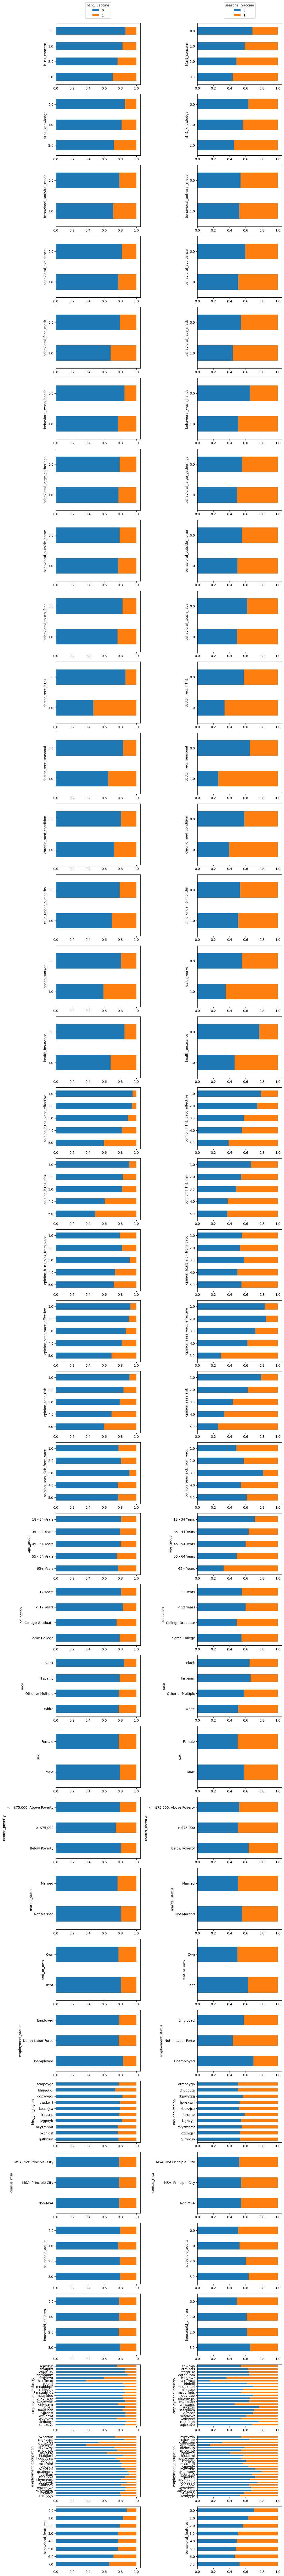

In [14]:
import matplotlib.pyplot as plt
# We add a few more columns
cols_to_plot = ['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation',
 'behavioral_features'
 ]



fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(12,len(cols_to_plot)*3)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

In [35]:
# read in the data
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/training_set_features.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_set_features.csv')
labels_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/training_set_labels.csv")

In [36]:
test_df['behave_features']= test_df['behavioral_avoidance'] +  test_df['behavioral_face_mask'] + test_df['behavioral_wash_hands'] + test_df['behavioral_large_gatherings'] + test_df['behavioral_outside_home'] + test_df['behavioral_touch_face']
train_df['behave_features']= train_df['behavioral_avoidance'] +  train_df['behavioral_face_mask'] + train_df['behavioral_wash_hands'] + train_df['behavioral_large_gatherings'] + train_df['behavioral_outside_home'] + train_df['behavioral_touch_face']

In [37]:
bad_predictors = [
      'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face','behavioral_antiviral_meds', 'child_under_6_months','opinion_h1n1_sick_from_vacc','sex','income_poverty','marital_status','hhs_geo_region','census_msa','employment_industry','employment_occupation'
]

In [38]:
train_df = train_df.drop(columns = bad_predictors)
test_df = test_df.drop(columns = bad_predictors)

In [ ]:
# # #eliminate null values

# # For float types
# float_cols = train_df.select_dtypes(include=[np.float]).columns
# imputer = KNNImputer(n_neighbors=5)
# train_df_float_imputed = pd.DataFrame(imputer.fit_transform(train_df[float_cols]), columns=float_cols)
# train_df[float_cols] = train_df_float_imputed

# # For string types
# train_df = train_df.fillna('No Category')

In [20]:
#for float types
train_df = train_df.fillna(train_df.mean())

#for string types
train_df = train_df.fillna('No Category')

<ipython-input-20-ff17c02b30d1>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df = train_df.fillna(train_df.mean())


In [21]:
test_df = test_df.fillna(test_df.mean())
test_df = test_df.fillna('No Category')

<ipython-input-21-7051169c5567>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df = test_df.fillna(test_df.mean())


In [ ]:
# # For float types
# float_cols = test_df.select_dtypes(include=[np.float]).columns
# imputer = KNNImputer(n_neighbors=5)
# test_df_float_imputed = pd.DataFrame(imputer.fit_transform(test_df[float_cols]), columns=float_cols)
# test_df[float_cols] = test_df_float_imputed

# # For string types
# test_df = test_df.fillna('No Category')

<ipython-input-140-d3b30328ab84>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  float_cols = test_df.select_dtypes(include=[np.float]).columns


In [22]:
labels_df=labels_df.iloc[:,[1,2]]

In [40]:
X, y1 = train_df,labels_df['seasonal_vaccine']
X_test = test_df

In [ ]:
LGBMClassifier()

###pipeline

In [24]:
distr1_params = {
    'ml__max_depth': randint(1, 15)
}

ml_pipeline = Pipeline(steps=[
    ('encoder', TargetEncoder()),
    #('scaler', StandardScaler()),
    ('ml', LGBMClassifier())
])

In [25]:
# Create the RandomizedSearchCV instance with the VotingClassifier
randomized1_lgbm = RandomizedSearchCV(
    ml_pipeline,
    distr1_params,
    cv=10,
    n_iter=10,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [26]:
# Fit the RandomizedSearchCV on X and y
randomized1_lgbm.fit(X, y1)
%timeit

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# Create the RandomizedSearchCV instance with the VotingClassifier
randomized1_rf = RandomizedSearchCV(
    ml_pipeline,
    distr1_params,
    cv=10,
    n_iter=10,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [ ]:
# Fit the RandomizedSearchCV on X and y
randomized1_rf.fit(X, y1)
%timeit

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('lgbm', randomized1_lgbm), ('rf', randomized1_rf)],
    voting='soft'
)

In [27]:
# Perform cross-validation on the best estimator
cross_val_scores1 = cross_val_score(
    randomized1_lgbm,
    X,
    y1,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1,
    verbose=1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 10.2min finished


In [ ]:
#voting_clf = voting_clf.fit(X,y1)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [41]:
y_pred1 = randomized1_lgbm.predict_proba(X_test)

In [28]:
np.mean(cross_val_scores1)

0.8572060647214835

In [30]:
#y_pred1 = voting_clf.predict_proba(X_test)

In [46]:
submission_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1_submission.csv')

In [47]:
submission_df["seasonal_vaccine"] = y_pred1[:, 1]

In [48]:
submission_df.to_csv('/content/drive/MyDrive/Colab Notebooks/1_submission.csv', index=True)

In [42]:
y_pred1

array([[0.88972287, 0.11027713],
       [0.96750876, 0.03249124],
       [0.378321  , 0.621679  ],
       ...,
       [0.82650827, 0.17349173],
       [0.77761981, 0.22238019],
       [0.34956254, 0.65043746]])